<table width="100%">
  <tr>
    <td width="50%" align="left">
      <img src="imgs/Brockmann_Consult_Logo_Horizontal_Tagline_1.1.png" alt="Company Logo" style="max-width: 100%; height: auto;" width="300">
    </td>
    <td width="50%" align="right">
      <img src="imgs/logo-light.png" alt="xcube logo" style="max-width: 100%; height: auto;" width="150">
    </td>
  </tr>
</table>

<table width="100%">
  <tr>
    <td width="100%" align="center">
      <h1 style="text-align: center; margin-bottom: 0.3em; font-weight: bold;">
        xcube Data Store Basics
      </h1>
      <div style="height: 0.5em;"></div>
      <h2 style="text-align: center; margin-top: 0; font-weight: bold;">
        Shown for "s3" Data Store
      </h2>
    </td>
  </tr>
</table>


**Author(s):** Clara Backens, Konstantin Ntokas, Pontus Lurcock  
**Affiliation:** Brockmann Consult GmbH  
**GitHub:** [xcube-dev/xcube](https://github.com/xcube-dev/xcube)
**Documentation:** [xcube](https://xcube.readthedocs.io/en/latest/)

---

## Introduction

This notebook introduces the core functionality of an xcube Data Store, which is shared across all xcube [data stores](https://xcube.readthedocs.io/en/latest/api.html#data-store-framework). As an example, we use the `"s3"` store.
These common features help you explore a store, understand its structure, and determine the parameters needed to open datacubes.

<div style="border: 2.5px solid #999; padding: 1em; border-radius: 6px; background-color: #eaeaea;">
  <strong>Objectives:</strong>
  <ul>
    <li>Understand the general functionalities of an xcube Data Store.</li>
    <li>See how these functionalities apply in practice interacting with a "s3" data store.</li>
  </ul>
</div>

> **Disclaimer**  
> This notebook demonstrates the use of open source software and is intended for educational and illustrative purposes only. All software used is subject to its respective licenses. The authors and contributors of this notebook make no guarantees about the accuracy, reliability, or suitability of the content or included code. Use at your own discretion and risk. No warranties are provided, either express or implied.


---

## Setup the usage of xcube data stores

The xcube data store framework is part of the xcube package which can be installed using either `pip` or `conda/mamba` from the conda-forge channel.

- 📦 **PyPI:** [xcube-core on PyPI](https://pypi.org/project/xcube-core/)  `pip install xcube-core`
- 🐍 **Conda (conda-forge):** [xcube on Anaconda](https://anaconda.org/conda-forge/xcube) `conda install -c conda-forge xcube`

  You can also use **Mamba** as a faster alternative to Conda: `mamba install -c conda-forge xcube`
  
---

### Data Stores

When installing xcube, is comes with file system based data stores like: 

- `"file"`: for the local filesystem
- `"s3"`: for AWS S3 compatible object storage
- `"abfs"`: for Azure blob storage
- `"https"`: for https protocols


Further data stores linking to other APIs like the Copernicus Data Store are implemented as plugins. All available data stores are shown on the [DeepESDL documentation](https://earthsystemdatalab.net/data/). Once installed, it registers automatically and can be accessed via xcube's `new_data_store()` method.
The most important operations related to data stores  are shown below. To explore all available functions, see the [Python API](https://eopf-sample-service.github.io/xcube-eopf/api/).

![all_datastores](imgs/all_datastores.png)

---

In [4]:
import os

import matplotlib.pyplot as plt
from xcube.core.store import  (
    get_data_store_params_schema,
    list_data_store_ids,
    new_data_store
)

One can list the available data stores with the python environment using the `list_data_store_ids` method. 

In [5]:
list_data_store_ids()

['abfs',
 'file',
 'ftp',
 'https',
 'memory',
 's3',
 'reference',
 'esa-cci',
 'esa-cdc',
 'esa-climate-data-centre',
 'esa-cci-kc',
 'esa-cdc-kc',
 'ccikc',
 'esa-cci-zarr',
 'esa-cdc-zarr',
 'ccizarr',
 'cciodp',
 'cds',
 'clms',
 'cmems',
 'sentinelhub',
 'sentinelhub-cdse',
 'smos',
 'stac',
 'stac-cdse',
 'stac-cdse-ardc',
 'stac-pc',
 'stac-pc-ardc',
 'stac-xcube',
 'zenodo']

Next, we can find out with data parameters are needed for a specific data store using the `get_data_store_params_schema` method. 

In [6]:
get_data_store_params_schema("s3")

Next we can initialize the "s3" data store attached the team buket using the `new_data_store` method.

In [7]:
store = new_data_store(
    "s3", 
    root=os.environ["S3_USER_STORAGE_BUCKET"], 
    storage_options=dict(
        anon=False, 
        key=os.environ["S3_USER_STORAGE_KEY"], 
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    )
)

Now we can navigate through the data store, where we first list all available data IDs. 

In [8]:
store.list_data_ids()

['oc_cci.zarr',
 'oc_glo_cmems_300m.zarr',
 'oc_glo_cmems_4km.zarr',
 'oc_nws_cmems.zarr',
 'oc_nws_l3_cmems.zarr',
 'sen2_l2a.levels',
 'sen2_l2a_0.zarr',
 'sen2_l2a_1.zarr',
 'sen2_l2a_2.zarr',
 'sen2_l2a_3.zarr']

One can also check if a data ID is available via the `has_data()` method, as shown below:

In [9]:
store.has_data("sen2_l2a.levels")

True

In [10]:
store.has_data("sen3_olci.levels")

False

Below, you can view the parameters for the `open_data()` method. The following cell generates a JSON schema that lists all opening parameters.

In [11]:
store.get_open_data_params_schema()

Below, you can view the parameters for the `open_data()` method for for a specific data ID.

In [12]:
store.get_open_data_params_schema(data_id="sen2_l2a.levels")

Next, we can access the Sentinel-2 L2A data cube using the `open_data` method. Note that the data is stored as an **xcube multi-scale Zarr pyramid**, also referred to as the [levels format](https://xcube.readthedocs.io/en/latest/mldatasets.html#the-xcube-levels-format). This format is similar to a GeoTIFF image pyramid.

When opened, the user receives a [`MultiLevelDataset`](https://xcube.readthedocs.io/en/latest/api.html#multi-resolution-datasets) object, which allows extraction of each layer of the pyramid.

In the following example, we first check how many layers are available.


In [13]:
mlds = store.open_data("sen2_l2a.levels")
mlds.num_levels

5

Next, we extract the base layer at its original resolution. This operation is **lazy**, meaning that only the dataset structure is represented initially. The actual data is loaded only when it is needed, for example, during plotting, writing, or performing computations that require eager evaluation.


In [14]:
ds = mlds.get_dataset(0)
ds

<xarray.Dataset> Size: 419GB
Dimensions:      (time: 30, lat: 17813, lon: 24492)
Coordinates:
  * time         (time) datetime64[ns] 240B 2023-06-01 2023-06-02 ... 2023-06-30
  * lat          (lat) float64 143kB 59.6 59.6 59.6 59.6 ... 58.0 58.0 58.0 58.0
  * lon          (lon) float64 196kB 4.3 4.3 4.3 4.3 4.3 ... 6.5 6.5 6.5 6.5 6.5
    spatial_ref  int64 8B ...
Data variables:
    B02          (time, lat, lon) float64 105GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B03          (time, lat, lon) float64 105GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B04          (time, lat, lon) float64 105GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B08          (time, lat, lon) float64 105GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    time_coverage_end:    <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...
    time_coverage_start:  <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...

Since the base layer is very large, we can extract the uppermost overview layer for plotting. These overview layers are also used in the **xcube Viewer** application to efficiently display large datasets at different zoom levels.

In [12]:
ds = mlds.get_dataset(4)
ds

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 30, lat: 1114, lon: 1531)
Coordinates:
  * time         (time) datetime64[ns] 240B 2023-06-01 2023-06-02 ... 2023-06-30
  * lat          (lat) float64 9kB 59.6 59.6 59.6 59.59 ... 58.0 58.0 58.0 58.0
  * lon          (lon) float64 12kB 4.3 4.301 4.303 4.304 ... 6.496 6.498 6.499
    spatial_ref  int64 8B ...
Data variables:
    B02          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B03          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B04          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    B08          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
    SCL          (time, lat, lon) float64 409MB dask.array<chunksize=(1, 1114, 1531), meta=np.ndarray>
Attributes:
    time_coverage_end:    <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...
    time_coverage_start:  <xarray.DataArray 'time' ()> Size: 8B\narray('2023-...

Finally, we plot the red band as an example, which **actually fetches the data**.

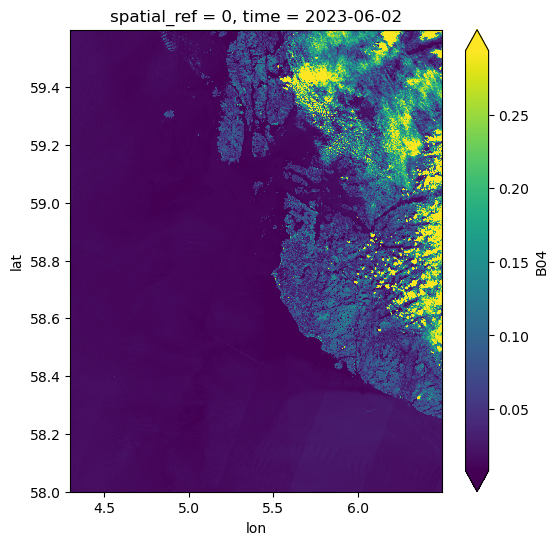

In [13]:
ds.B04.isel(time=1).plot(robust=True, figsize=(6, 6))

---

<table width="100%">
  <tr>
    </td>
    <td width="20%"></td>
    <td width="60%" align="center" style="font-size: 0.9em; color: #666; vertical-align: middle;">
      &copy; 2025 Brockmann Consult GmbH &nbsp;|&nbsp;
      <a href="https://www.brockmann-consult.de" target="_blank">Website</a>
    <td width="20%" align="right" style="vertical-align: middle;">
      <img src="imgs/Brockmann_Consult_Logo_Horizontal_1.1.png" alt="Company Logo" width="150">
    </td>
  </tr>
</table>